In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import missingno as msno 

In [2]:
df = pd.read_csv('surat_outlier.csv')

df.shape

(3228, 13)

In [3]:
df.head()

location  bhk     areaType  square_feet   transaction              status  \
0  palanpur    2   Super Area         1311  New Property  Under Construction   
1  palanpur    3   Super Area         1586  New Property           Undefined   
2  palanpur    2   Super Area         1185  New Property       Ready to Move   
3   dindoli    2  Carpet Area          644  New Property  Under Construction   
4  palanpur    2   Super Area         1204  New Property  Under Construction   

   floorNum  totalFloor   furnishing facing  price_per_sqft  price  \
0       NaN         NaN  Unfurnished    NaN          4251.0   0.56   
1       NaN         NaN  Unfurnished    NaN          3751.0   0.59   
2       5.0        14.0  Unfurnished   East          3784.0   0.45   
3       5.0        10.0  Unfurnished   West          2891.0   0.34   
4       7.0        14.0  Unfurnished   East          3838.0   0.46   

   built_up_area  
0           1311  
1           1586  
2           1185  
3            708  
4           1204

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

location          240
bhk                 0
areaType            0
square_feet         0
transaction        14
status              0
floorNum          201
totalFloor        201
furnishing         22
facing            824
price_per_sqft    268
price             170
built_up_area       0
dtype: int64

In [6]:
round(df.isna().mean()*100,2)

location           7.43
bhk                0.00
areaType           0.00
square_feet        0.00
transaction        0.43
status             0.00
floorNum           6.23
totalFloor         6.23
furnishing         0.68
facing            25.53
price_per_sqft     8.30
price              5.27
built_up_area      0.00
dtype: float64

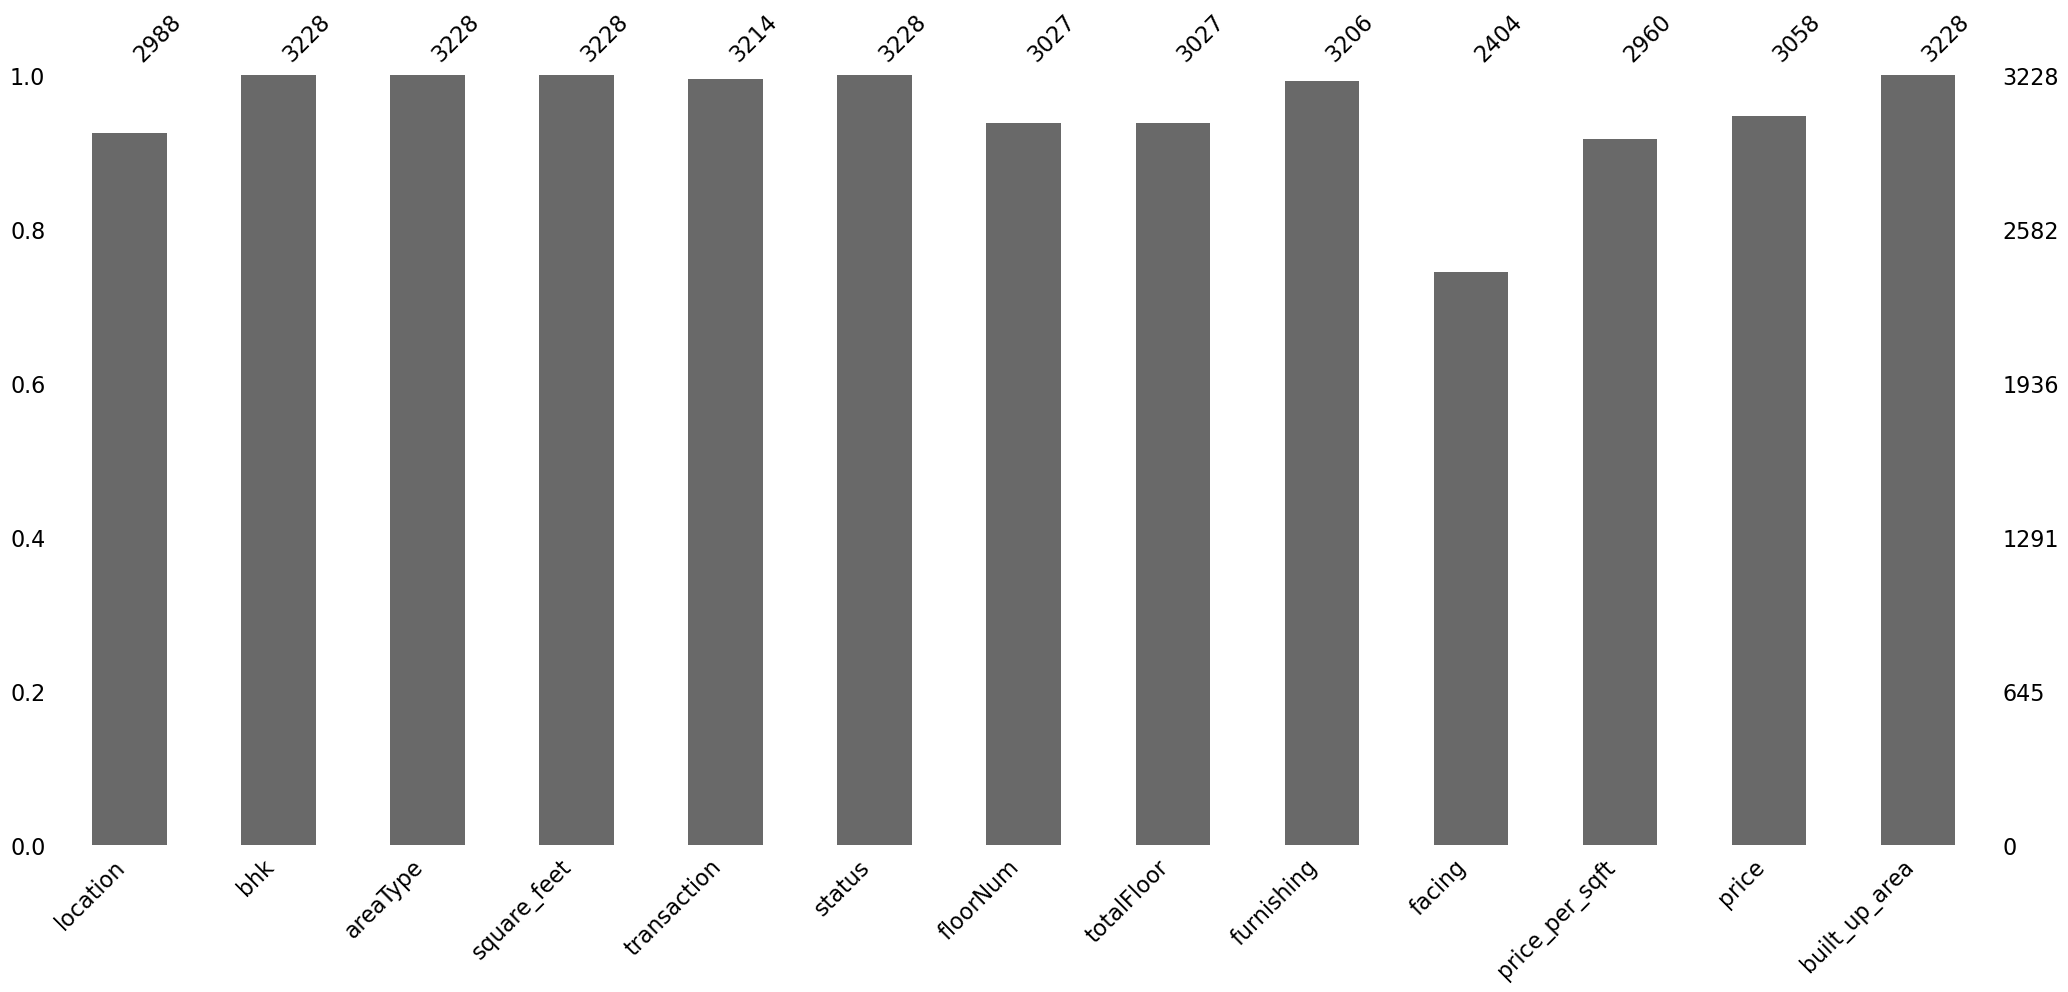

In [7]:
msno.bar(df)
plt.show()

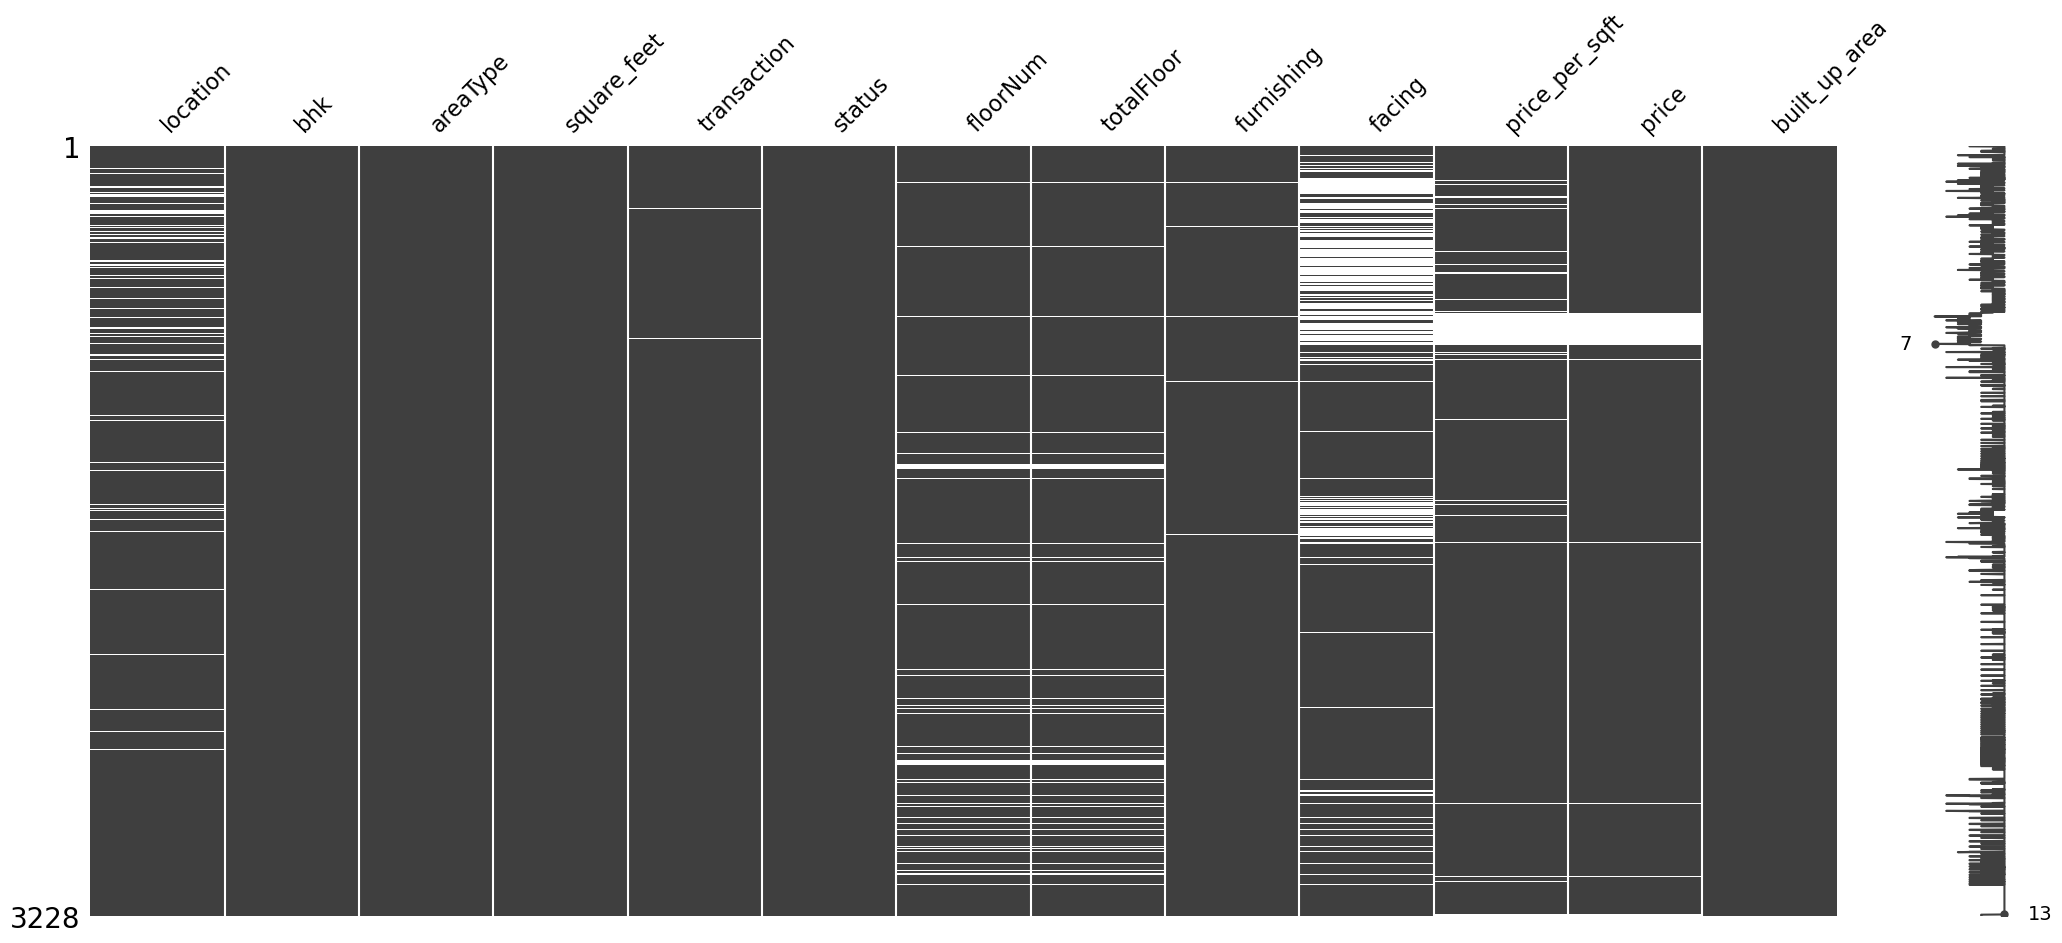

In [8]:
msno.matrix(df)
plt.show()

In [9]:
# msno.heatmap(df)
# plt.show()

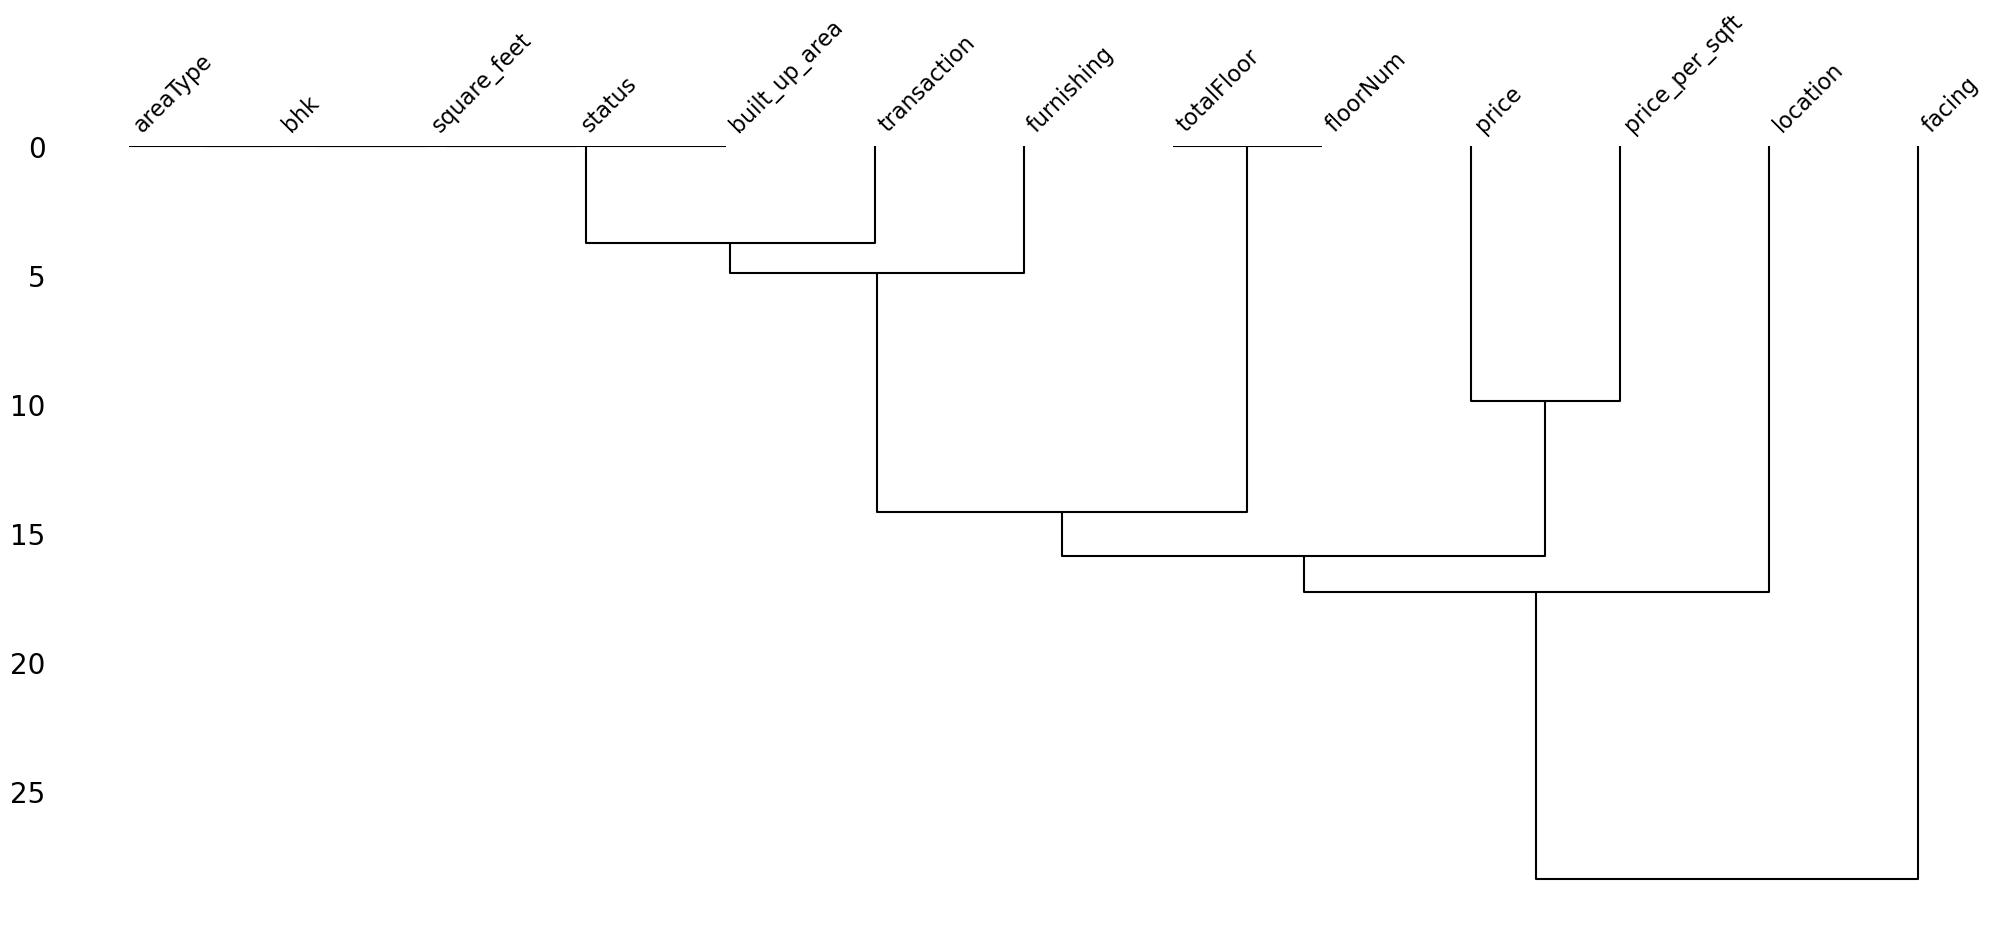

In [10]:
# Dendrogram to visualize the hierarchical clustering of missing values
msno.dendrogram(df)
plt.show()

# Handling Missing values

# location Null Values Treatment

In [11]:
df.isna().sum()

location          240
bhk                 0
areaType            0
square_feet         0
transaction        14
status              0
floorNum          201
totalFloor        201
furnishing         22
facing            824
price_per_sqft    268
price             170
built_up_area       0
dtype: int64

In [12]:
df = df[~((df['location'].isna()) & (df['price'].isna()))]

In [13]:
df[df['price']>3]['location'].value_counts()

location
vesu                 130
dumas road/hazira     23
athwalines            10
pal                    6
althan                 5
adajan                 3
Name: count, dtype: int64

In [14]:
df[(df['price']>2) & (df['price'] <= 3)]['location'].value_counts()

location
vesu                 151
pal                   27
dumas road/hazira     12
adajan                 8
althan                 5
athwalines             2
Name: count, dtype: int64

In [15]:
df[(df['price'] > 1) & (df['price'] <= 2)]['location'].value_counts()

location
vesu                 370
pal                   95
dumas road/hazira     57
althan                48
adajan                31
athwalines            20
palanpur              14
sarthana/varachha      1
dindoli                1
jahangirpura           1
katargam               1
Name: count, dtype: int64

In [16]:
df[(df['price'] <= 1)]['location'].value_counts()

location
palanpur                              412
pal                                   210
jahangirpura                          203
althan                                192
vesu                                  186
adajan                                164
dindoli                               113
athwalines                             69
dumas road/hazira                      60
udhna                                  45
amroli                                 37
nanpura/gopipura/chauta/sagrampura     30
sarthana/varachha                      27
katargam                               26
punagam                                19
kamrej                                 11
sachin                                  9
kadodara                                8
bardoli                                 4
Name: count, dtype: int64

In [17]:
df.isna().sum()

location          212
bhk                 0
areaType            0
square_feet         0
transaction        12
status              0
floorNum          201
totalFloor        201
furnishing         22
facing            799
price_per_sqft    240
price             142
built_up_area       0
dtype: int64

In [18]:
# Function to update 'location' based on 'price'
def update_location(row):
    if pd.isna(row['location']):
        if row['price'] > 3:
            return 'vesu'
        elif 2 < row['price'] <= 3:
            return 'vesu'
        elif 1 < row['price'] <= 2:
            return 'vesu'
        else:
            return 'palanpur'
    return row['location']

df['location'] = df.apply(update_location, axis=1)

In [19]:
df['location'].value_counts()

location
vesu                                  881
palanpur                              620
pal                                   339
althan                                261
adajan                                210
jahangirpura                          204
dumas road/hazira                     157
dindoli                               126
athwalines                            106
udhna                                  57
amroli                                 53
nanpura/gopipura/chauta/sagrampura     37
katargam                               36
sarthana/varachha                      30
kamrej                                 25
punagam                                22
sachin                                 18
kadodara                               12
bardoli                                 6
Name: count, dtype: int64

# Transaction & Furnishing

In [20]:
df = df[~((df['transaction'].isna()) & (df['price'].isna()))]
df = df[~(df['furnishing'].isna())]

df.reset_index(drop=True, inplace=True)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


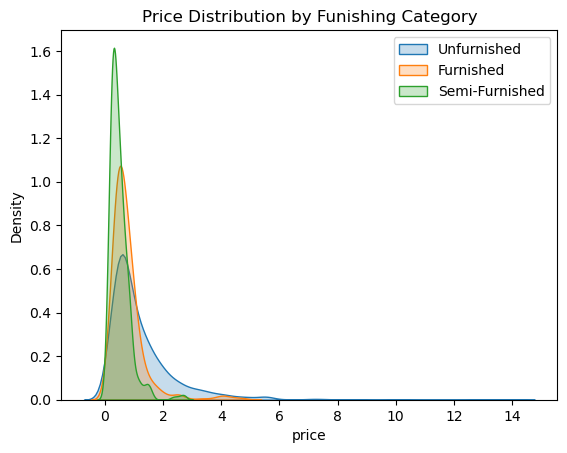

In [21]:
sns.kdeplot(df[df['furnishing'] == 'Unfurnished']['price'], label='Unfurnished', fill=True)
sns.kdeplot(df[df['furnishing'] == 'Furnished']['price'], label='Furnished', fill=True)
sns.kdeplot(df[df['furnishing'] == 'Semi-Furnished']['price'], label='Semi-Furnished', fill=True)
plt.title('Price Distribution by Funishing Category')
plt.xlabel('price')
plt.ylabel('Density')
plt.legend()
plt.show()

In [22]:
df.shape

(3177, 13)

In [23]:
df[df['transaction'].isna()]

location  bhk     areaType  square_feet transaction         status  \
130       vesu    1  Carpet Area          500         NaN  Ready to Move   
152   palanpur    1  Carpet Area          700         NaN  Ready to Move   
254    dindoli    2  Carpet Area          897         NaN  Ready to Move   
278   palanpur    2  Carpet Area         1246         NaN  Ready to Move   
441     adajan    2  Carpet Area          512         NaN  Ready to Move   
500     adajan    2  Carpet Area         1190         NaN  Ready to Move   
548     adajan    2  Carpet Area          955         NaN  Ready to Move   
899      udhna    1  Carpet Area          650         NaN  Ready to Move   
1458      vesu    3  Carpet Area         1919         NaN  Ready to Move   
1509      vesu    3  Carpet Area         1934         NaN  Ready to Move   
1533  palanpur    3  Carpet Area         1955         NaN  Ready to Move   

      floorNum  totalFloor      furnishing facing  price_per_sqft  price  \
130        4.0         8.0     Unfurnished    NaN             NaN   0.16   
152        9.0        12.0     Unfurnished    NaN             NaN   0.54   
254        2.0         5.0       Furnished    NaN             NaN   0.23   
278        4.0        12.0  Semi-Furnished    NaN             NaN   0.50   
441        2.0        13.0  Semi-Furnished    NaN             NaN   0.15   
500        7.0         7.0  Semi-Furnished    NaN             NaN   0.40   
548        3.0         7.0       Furnished    NaN             NaN   0.55   
899        4.0         4.0  Semi-Furnished    NaN             NaN   0.14   
1458       7.0        12.0     Unfurnished    NaN             NaN   1.00   
1509      11.0        13.0       Furnished    NaN             NaN   1.25   
1533      10.0        14.0       Furnished    NaN             NaN   1.10   

      built_up_area  
130             550  
152             770  
254             987  
278            1371  
441             563  
500            1309  
548            1050  
899             715  
1458           2111  
1509           2127  
1533           2150

In [24]:
df[df['transaction'] == 'Resale']['status'].value_counts()

status
Ready to Move         1469
Under Construction      81
Undefined               29
Name: count, dtype: int64

In [25]:
df[df['transaction'] == 'New Property']['status'].value_counts()

status
Under Construction    948
Ready to Move         616
Undefined              23
Name: count, dtype: int64

In [26]:
df['transaction'].fillna('Resale', inplace=True)

# FloorNum & TotalFloor

In [27]:
df.isna().sum()

location            0
bhk                 0
areaType            0
square_feet         0
transaction         0
status              0
floorNum          184
totalFloor        184
furnishing          0
facing            776
price_per_sqft    235
price             137
built_up_area       0
dtype: int64

In [28]:
df = df[~((df['floorNum'].isna()) & (df['price'].isna()))]
df = df[~((df['floorNum'].isna()) & (df['totalFloor'].isna()) & (df['facing'].isna()))]

df.reset_index(drop=True, inplace=True)

In [29]:
df['floorNum'].median()

5.0

In [30]:
df['floorNum'].fillna(df['floorNum'].median(), inplace=True)
df['totalFloor'].fillna(df['totalFloor'].median(), inplace=True)

In [31]:
df.isna().sum()

location            0
bhk                 0
areaType            0
square_feet         0
transaction         0
status              0
floorNum            0
totalFloor          0
furnishing          0
facing            703
price_per_sqft    225
price             127
built_up_area       0
dtype: int64

# Facing

In [32]:
df[df['facing'].isna()]

location  bhk     areaType  square_feet   transaction  \
10        palanpur    2   Super Area         1150        Resale   
18             pal    3  Carpet Area         1600        Resale   
36        palanpur    3   Super Area         1515        Resale   
37    jahangirpura    2  Carpet Area          800  New Property   
38          althan    2   Super Area         1173        Resale   
...            ...  ...          ...          ...           ...   
2665          vesu    6   Super Area         6130        Resale   
2667          vesu    3  Carpet Area         3000  New Property   
2876          vesu    4   Super Area         3401  New Property   
2906          vesu    4   Super Area         4000  New Property   
2912          vesu    3   Super Area         2565  New Property   

                  status  floorNum  totalFloor      furnishing facing  \
10             Undefined       1.0         7.0     Unfurnished    NaN   
18         Ready to Move       2.0        13.0  Semi-Furnished    NaN   
36         Ready to Move       3.0         5.0  Semi-Furnished    NaN   
37    Under Construction       5.0        13.0     Unfurnished    NaN   
38         Ready to Move       8.0        19.0     Unfurnished    NaN   
...                  ...       ...         ...             ...    ...   
2665       Ready to Move      11.0        12.0     Unfurnished    NaN   
2667  Under Construction       4.0         9.0     Unfurnished    NaN   
2876  Under Construction       1.0        12.0     Unfurnished    NaN   
2906       Ready to Move      12.0        12.0     Unfurnished    NaN   
2912  Under Construction       4.0        13.0     Unfurnished    NaN   

      price_per_sqft  price  built_up_area  
10            3304.0   0.38           1150  
18               NaN   0.56           1760  
36            3960.0   0.60           1515  
37            2868.0   0.38            880  
38            4774.0   0.56           1173  
...              ...    ...            ...  
2665          4486.0   2.75           6130  
2667             NaN   2.00           3300  
2876          5601.0   1.90           3401  
2906          6500.0   2.60           4000  
2912          6570.0   1.68           2565  

[703 rows x 13 columns]

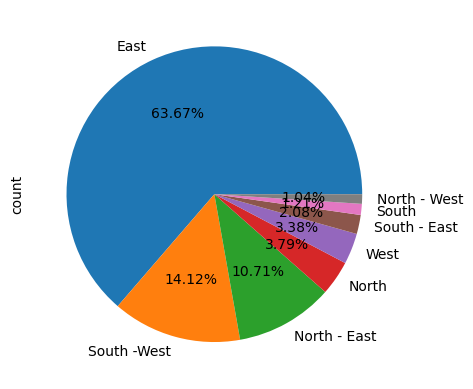

In [33]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [34]:
df['facing'].value_counts()

facing
East            1528
South -West      339
North - East     257
North             91
West              81
South - East      50
South             29
North - West      25
Name: count, dtype: int64

In [35]:
df['facing'].fillna('North - West', inplace=True)

In [36]:
df['facing'].value_counts()

facing
East            1528
North - West     728
South -West      339
North - East     257
North             91
West              81
South - East      50
South             29
Name: count, dtype: int64

In [37]:
df.shape

(3103, 13)

# Price

In [38]:
df.isna().sum()

location            0
bhk                 0
areaType            0
square_feet         0
transaction         0
status              0
floorNum            0
totalFloor          0
furnishing          0
facing              0
price_per_sqft    225
price             127
built_up_area       0
dtype: int64

In [39]:
df[(df['price'].isna())]['location'].value_counts()

location
vesu                                  16
amroli                                14
kamrej                                13
udhna                                 12
althan                                10
sachin                                 9
katargam                               9
dindoli                                8
nanpura/gopipura/chauta/sagrampura     7
dumas road/hazira                      5
athwalines                             5
kadodara                               4
adajan                                 4
punagam                                3
palanpur                               3
bardoli                                2
sarthana/varachha                      2
pal                                    1
Name: count, dtype: int64

In [40]:
round(df.groupby('location')['price'].mean(), 2)

location
adajan                                0.75
althan                                0.88
amroli                                0.36
athwalines                            1.26
bardoli                               0.15
dindoli                               0.36
dumas road/hazira                     1.80
jahangirpura                          0.46
kadodara                              0.15
kamrej                                0.28
katargam                              0.32
nanpura/gopipura/chauta/sagrampura    0.29
pal                                   1.07
palanpur                              0.53
punagam                               0.33
sachin                                0.22
sarthana/varachha                     0.45
udhna                                 0.28
vesu                                  1.88
Name: price, dtype: float64

In [41]:
# Function to fill missing 'price' values based on 'location' using mean values
def fill_price(row):
    if pd.isna(row['price']):
        if row['location'] == 'vesu':
            return 1.88
        elif row['location'] == 'amroli':
            return 0.36
        elif row['location'] == 'kamrej':
            return 0.28
        elif row['location'] == 'udhna':
            return 0.28
        elif row['location'] == 'althan':
            return 0.88
        elif row['location'] == 'sachin':
            return 0.22
        elif row['location'] == 'katargam':
            return 0.32
        elif row['location'] == 'dindoli':
            return 0.36
        elif row['location'] == 'nanpura/gopipura/chauta/sagrampura':
            return 0.36
        elif row['location'] == 'dumas road/hazira':
            return 1.8
        elif row['location'] == 'athwalines':
            return 1.26
        elif row['location'] == 'kadodara':
            return 0.15
        elif row['location'] == 'adajan':
            return 0.75
        elif row['location'] == 'sarthana/varachha':
            return 0.45
        elif row['location'] == 'punagam':
            return 0.32
        elif row['location'] == 'palanpur':
            return 0.54
        elif row['location'] == 'bardoli':
            return 0.15
        elif row['location'] == 'pal':
            return 1.07
    return row['price']

df['price'] = df.apply(fill_price, axis=1)

# Price Per sqft

In [42]:
df.isna().sum()

location            0
bhk                 0
areaType            0
square_feet         0
transaction         0
status              0
floorNum            0
totalFloor          0
furnishing          0
facing              0
price_per_sqft    225
price               0
built_up_area       0
dtype: int64

In [43]:
df[df['price_per_sqft'].isna()]

location  bhk     areaType  square_feet   transaction  \
18             pal    3  Carpet Area         1600        Resale   
35          althan    2  Carpet Area          850        Resale   
45    jahangirpura    3  Carpet Area           80        Resale   
54    jahangirpura    2  Carpet Area         1200        Resale   
89        palanpur    4  Carpet Area         1300        Resale   
...            ...  ...          ...          ...           ...   
3098          vesu    4  Carpet Area         1870  New Property   
3099        althan    4   Super Area         3600  New Property   
3100          vesu    4   Super Area         4500  New Property   
3101          vesu    5  Carpet Area         2250  New Property   
3102          vesu    6  Carpet Area         3450  New Property   

                  status  floorNum  totalFloor      furnishing        facing  \
18         Ready to Move       2.0        13.0  Semi-Furnished  North - West   
35         Ready to Move       4.0         7.0       Furnished  South - East   
45         Ready to Move       2.0        12.0     Unfurnished          East   
54         Ready to Move       2.0        14.0     Unfurnished          East   
89         Ready to Move       0.0         2.0       Furnished  North - West   
...                  ...       ...         ...             ...           ...   
3098  Under Construction       6.0        11.0     Unfurnished  North - East   
3099  Under Construction       5.0        16.0     Unfurnished  South - East   
3100       Ready to Move       3.0        12.0     Unfurnished         North   
3101  Under Construction       7.0        13.0     Unfurnished  North - East   
3102       Ready to Move       7.0        18.0     Unfurnished  North - West   

      price_per_sqft  price  built_up_area  
18               NaN   0.56           1760  
35               NaN   0.45            935  
45               NaN   0.36             88  
54               NaN   0.35           1320  
89               NaN   0.45           1430  
...              ...    ...            ...  
3098             NaN   1.88           2057  
3099             NaN   0.88           3600  
3100             NaN   1.88           4500  
3101             NaN   1.88           2475  
3102             NaN   1.88           3795  

[225 rows x 13 columns]

In [44]:
df.loc[df['price_per_sqft'].isna(), 'price_per_sqft'] = (df['price'] * 1e7) / df['square_feet']

In [45]:
df.isna().sum()

location          0
bhk               0
areaType          0
square_feet       0
transaction       0
status            0
floorNum          0
totalFloor        0
furnishing        0
facing            0
price_per_sqft    0
price             0
built_up_area     0
dtype: int64

In [46]:
df['status'].value_counts()

status
Ready to Move         2093
Under Construction     964
Undefined               46
Name: count, dtype: int64

In [47]:
x = df[(df['status'] == 'Undefined') & (df['transaction'] == 'Resale')]

df.loc[x.index, df.columns[5]] = 'Ready to Move'

y = df[(df['status'] == 'Undefined') & (df['transaction'] == 'New Property')]

df.loc[y.index, df.columns[5]] = 'Under Construction'

In [48]:
df['status'].value_counts()

status
Ready to Move         2121
Under Construction     982
Name: count, dtype: int64

# Export Dataset

In [49]:
df.to_csv('surat_mvi.csv', index=False)